# This is the analysis and plottign script for the Multipolarity analysis of gastruloid live movie data

All plots shown in Fig 2B-F and S3C-H can be recreated using this code & the data frames extracted from the previous multipolarity live movie analysis scripts, the one stored on Zenodo, or an examplary data frame stored in this repo.

### Imports

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sys import path
from scipy.stats import norm

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.use14corefonts'] = True

cwd = os.getcwd()
modules = cwd.replace('/exe/multipolarity_analysis', '')
path.insert(1, modules)

import modules.configs_setup as configs
import modules.processed_data_analysis as pda

### Read in ananlysis configs and data

In [2]:
# big analysis folder with all data and configs folder
data_folder = cwd+'/'
folders_OI = ['150' ,'300', '600', '1200']

# load configs
cnfgs = configs.load_configs(data_folder)


# load plotting params
plot_params = configs.load_default_plot_params()

for p,v in plot_params['rcParams'].items():
    rcParams[p] = v
    

plots_folder = cnfgs['results_folder']
fig_format = plot_params['format']
color_dict_sizes = plot_params['color_dict_sizes']
color_dict_sizes['150'] = color_dict_sizes['100']
line_style_dict = plot_params['line_style_dict']

# 1h time intervals as imaged
keys = np.arange(73, 144)

# get all json files from all folders
all_df_list = list()

for folder_OI in folders_OI:
    df_list = sorted([cnfgs['data_paths'][folder_OI] + f for f in os.listdir(cnfgs['data_paths'][folder_OI]) if
                      f.endswith(cnfgs['data_paths']['ending'])])
    all_df_list.extend(df_list)
    
print('Number of dataframes: ', len(all_df_list))


# number of movies/gastruloids to be analysed per condition
list_len = list()
sizes = folders_OI
for n in sizes:
    list_len.append(len([f for f in all_df_list if n in f]))
    
# need to match in length
print('Number of dataframes per size condition: ', list_len, '  Sum: ', sum(list_len))

Loaded 2025-01-21_configs.yml.
Number of dataframes:  190
Number of dataframes per size condition:  [41, 49, 48, 52]   Sum:  190


In [3]:
# combining data from all movies of all sizes 

param1 = 'n_fluo_poles'
poles = np.zeros((len(all_df_list), 71))

param2 = 'Area'
areas = np.zeros((len(all_df_list), 71))

param3 = 'MA_length_um'
MA = np.zeros((len(all_df_list), 71))

param4 = 'AR'
AR = np.zeros((len(all_df_list), 71))

param5 = 'Circularity'
circ = np.zeros((len(all_df_list), 71))


for i, f in enumerate(sorted(all_df_list)):
    print(i)
    df = pda.load_processed_df(f)
    df = pda.filter_multipolarity_outliers(f, df, cnfgs['outliers'])
    
    poles[i, :] = df[param1]
    areas[i, :] = df[param2]
    MA[i, :] = df[param3]
    AR[i, :] = df[param4]
    circ[i, :] = df[param5]


0
# rows:  71
1
# rows:  71
2
# rows:  71
3
# rows:  71
4
# rows:  71
5
# rows:  71
6
# rows:  71
7
# rows:  71
8
# rows:  71
9
# rows:  71
10
# rows:  71
11
# rows:  71
12
# rows:  71
13
# rows:  71
14
# rows:  71
15
# rows:  71
16
# rows:  71
17
# rows:  71
18
# rows:  71
19
# rows:  71
20
# rows:  71
21
# rows:  71
22
# rows:  71
23
# rows:  71
24
# rows:  71
25
# rows:  71
26
# rows:  71
27
# rows:  71
28
# rows:  71
29
# rows:  71
30
# rows:  71
31
# rows:  71
32
# rows:  71
33
# rows:  71
34
# rows:  71
35
# rows:  71
36
# rows:  71
37
# rows:  71
38
# rows:  71
39
# rows:  71
40
# rows:  71
41
# rows:  71
42
# rows:  71
43
# rows:  71
44
# rows:  71
45
# rows:  71
46
# rows:  71
47
# rows:  71
48
# rows:  71
49
# rows:  71
50
# rows:  71
51
# rows:  71
52
# rows:  71
53
# rows:  71
54
# rows:  71
55
# rows:  71
56
# rows:  71
57
# rows:  71
58
# rows:  71
59
# rows:  71
60
# rows:  71
61
# rows:  71
62
# rows:  71
63
# rows:  71
64
# rows:  71
65
# rows:  71
66
# rows:  71
67
# 

## Counting Mesp2 poles per gastruloid over time across different sizes

### Figure 2 B

Heatmap of Mesp2-positive pole counts (0 through 4, top legend) over time (73-143h) for gastruloids with N0 = 150 (n = 41), 300 (n = 49), 600 (n = 48), and 1200 (n = 51). Each vertical line represents a gastruloid, color code indicated the number of detected Mesp2 poles at a measured time point.

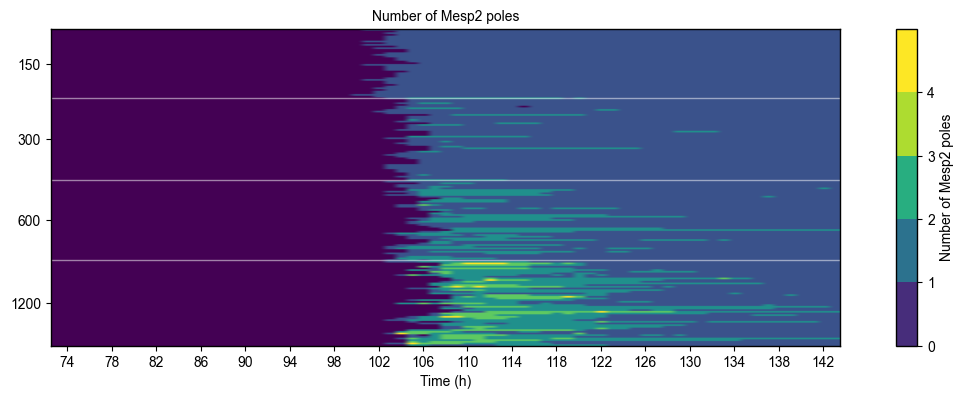

In [4]:
plt.figure(figsize=(12, 4))

plt.imshow(poles,cmap='viridis', aspect=0.15)
plt.colorbar(aspect=15, ticks=np.arange(0, 5, 1), boundaries=np.arange(0, 6, 1), format='%1i', 
             label='Number of Mesp2 poles')

i=1
plt.xlabel('Time (h)')
plt.title('Number of Mesp2 poles')
plt.axhline(list_len[0], color = 'white', alpha=0.5)
plt.axhline(sum(list_len[:2]), color = 'white', alpha=0.5)
plt.axhline(sum(list_len[:3]), color = 'white', alpha=0.5)
plt.yticks([sum(list_len[:y])+list_len[y]/2 for y in range(4)], sizes)
plt.xticks(np.arange(0+i, len(df)+i, 1)[::4], labels= np.arange(73+i, 73+len(df)+i, 1)[::4])

plt.tight_layout()
#plt.savefig(plots_folder+ 'number_poles_heatmap_legend.svg', dpi=200, transparent=True)
plt.show()

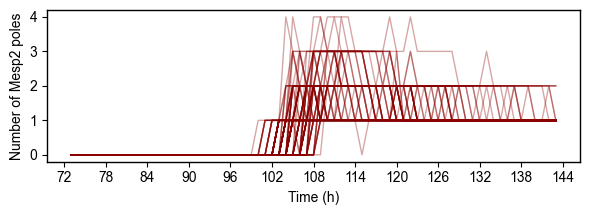

In [5]:
fig, ax = plt.subplots(figsize=(6, 2.25))

for pole in poles:
    ax.plot(keys, pole, color='darkred', alpha=0.35)
    
i=-1
ax.set_xticks(np.arange(73+i, 73+len(df)+2, 1)[::6])   

ax.set_axisbelow(True)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Number of Mesp2 poles')
plt.tight_layout()
#plt.savefig(plot_path + 'signgle_trajectories.pdf')
plt.show()

Zoomed in view of the same heatmap (96-143h).

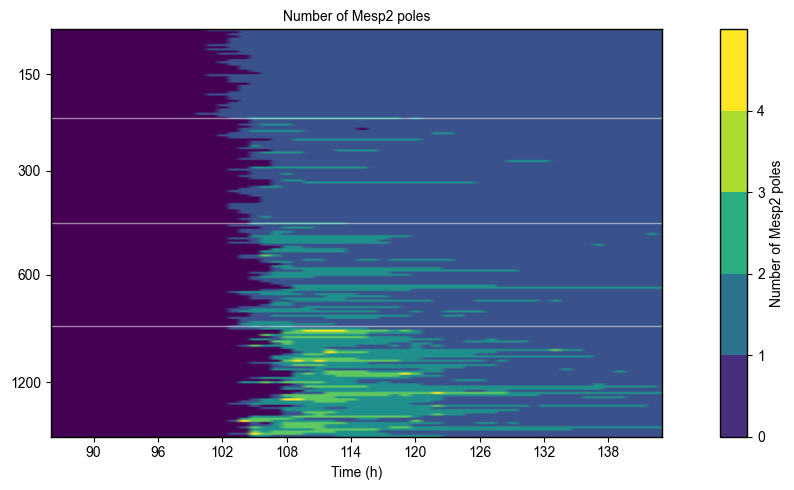

In [6]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(12, 5))

plt.imshow(poles,cmap='viridis', aspect=0.2)

plt.xlabel('Time (h)')
plt.colorbar(aspect=15, ticks=np.arange(0, 5, 1), boundaries=np.arange(0, 6, 1), format='%1i', 
             label='Number of Mesp2 poles')
i=-1
plt.title('Number of Mesp2 poles')
plt.axhline(list_len[0], color = 'white', alpha=0.5)
plt.axhline(sum(list_len[:2]), color = 'white', alpha=0.5)
plt.axhline(sum(list_len[:3]), color = 'white', alpha=0.5)
plt.yticks([sum(list_len[:y])+list_len[y]/2 for y in range(4)], sizes)
plt.xticks(np.arange(0+i, len(df)+i, 1)[::6], labels= np.arange(73+i, 73+len(df)+i, 1)[::6])
plt.xlim(13, 70)#23

plt.tight_layout()
#plt.savefig(plot_path+ 'number_poles_heatmap_legend.svg', dpi=200, transparent=True)
plt.show()

## Dynamics of Mesp2 poles over time

In [7]:
start = 0
max_pole = {}
multipol_dict = {}
uniax_transition = {}
polar_transition = {}
merged_transition = {}

data_dict = {}


for i, (l, g) in enumerate(zip(list_len, sizes)):
    
    group_data = poles[start:start+l]
    
    # get maximum number of poles
    max_pole[g] = pda.get_max_n_poles(group_data)
    
    # get number and fraction of multipolar gastruloids 
    multi = pda.get_n_multipol(group_data)
    multipol_dict[g] = [multi, l, multi/l]
    
    # get statistics on the dynamics of the number of poles
    data_dict[g] = pda.get_multipolar_dynamics_stats(group_data)
    
    # get time point of polarization
    polar_transition[g] = pda.get_polarization_t(group_data)
    
    # get time point of achieving uniaxiality
    uniax_transition[g] = pda.get_uniaxial_t(group_data)
    
    # get time point of achieving uniaxiality through merging of multiple poles
    merged_transition[g] = pda.get_merging_t(group_data)
    
    start += l
    

/Users/ph6877/Documents/PhD/00_Gregor_Lab/Image analysis/Code/SizeProject24/modules/processed_data_analysis.py:807: RuntimeWarning: invalid value encountered in divide
  cv = np.divide(std, mean)


## Figure 2 C 

1. Maximum number of Mesp2 poles per gastruloid size condition

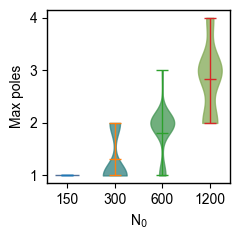

In [8]:
plt.figure(figsize=(2.5,2.5))
for i, (l, g) in enumerate(zip(list_len, sizes)):
    
    plot = plt.violinplot(max_pole[g], positions=[i], showmeans=True, showmedians=False,
        showextrema=True, vert=True)
    
    for pc in plot['bodies']:
        pc.set_facecolor(color_dict_sizes[g])
        pc.set_edgecolor(color_dict_sizes[g])
        pc.set_alpha(0.75)
        

plt.xlabel('N$_0$')
plt.ylabel('Max poles')
plt.xticks(np.arange(4),sizes)
plt.yticks(np.arange(1,5))

plt.tight_layout()
#plt.savefig(plot_path+ 'max_number_of_poles90.svg', dpi=200, transparent=True)

plt.show()

2. Fractions of gastruloids that are at the end of the measurement uniaxial (have a single stable pole) per size condition
3. Fractions of gastruloids that are at least once detected as multipolar per size condition

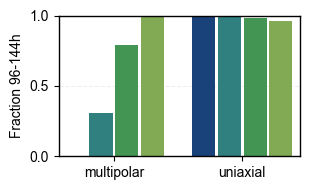

In [9]:
fig, ax = plt.subplots(figsize=(3.2,2))

multipol = [v[2] for v in multipol_dict.values()]
uniaxial = [len(v)/l for l, v in zip(list_len, uniax_transition.values())]


for i, key in enumerate(sizes):
    
    for j, data in enumerate([multipol, uniaxial]):
        ax.bar(i*0.2+j, data[i], color=color_dict_sizes[key], width=0.18)

ax.set_axisbelow(True)
ax.set_xlim(-0.13,1.75)
ax.set_xticks([0.15*2+0, 0.15*2+1], [ 'multipolar', 'uniaxial'])
ax.set_ylim(0,1)
ax.set_yticks([0, 0.5, 1.0])
ax.set_ylabel('Fraction 96-144h')
ax.yaxis.grid(color='lightgray', linestyle='dashed', alpha=0.35)

fig.tight_layout()
#plt.savefig(plots_folder+ 'multipolarity_uniaxial_bar.svg', dpi=200, transparent=True)
plt.show()

## Dynamics of Mesp2 poles over time


### Figure 2 D

Temporal dynamics of the number of Mesp2 poles (mean ± s.e.m.) for different sizes.

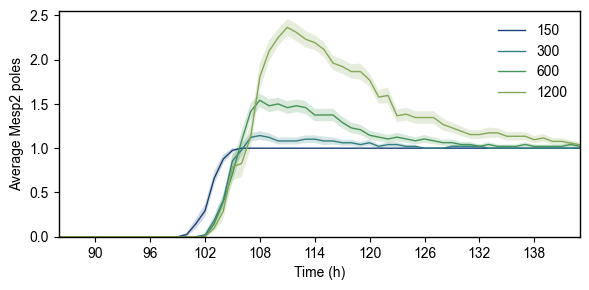

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6, 3.))
for l, g in zip(list_len, sizes):
    
    mean, var, std, cv =  data_dict[g]
    ax.plot(keys, mean, label=g, color=color_dict_sizes[g], lw=1)
    ax.fill_between(keys, mean+(std/(l)**0.5), mean-(std/(l)**0.5),  alpha=0.2, color=color_dict_sizes[g], lw=0) 
    
i=-1
ax.set_xticks(np.arange(73+i, 73+len(df)+i, 1)[::6])   
ax.set_xlim(86, 143)
ax.set_ylim(0, 2.55)
ax.set_axisbelow(True)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Average Mesp2 poles')    
ax.legend(frameon=False)

fig.tight_layout()
#plt.savefig(plot_path+ 'mean_se_number_poles_zoom.svg', dpi=200, transparent=True)
plt.show()

## Polarization time

### Figure 2 E

= Transition from 0 pole to 1 or more poles (initiation of transcription and (multi)polarity)

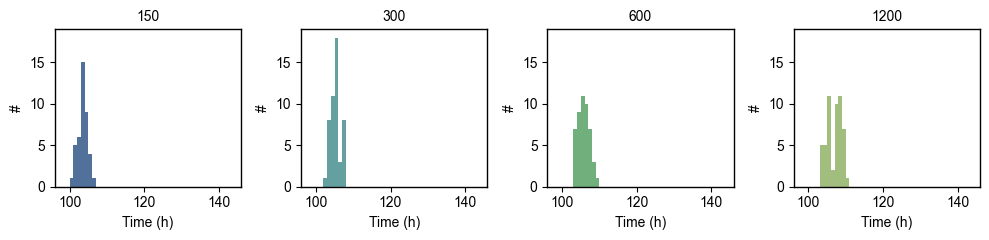

In [11]:
# individual histograms per size group
fig, axes = plt.subplots(1, 4, figsize=(10,2.5))

for i, (g, ax) in enumerate(zip(sizes, axes)):
       
    ax.hist(polar_transition[g], label=g, alpha=0.75, range=(96, 146), bins=146-96, 
            density=False, color=color_dict_sizes[g])
    
    ax.set_title(g)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('#')
    ax.set_xlim(96, 146)
    ax.set_ylim(0,19)
    
plt.tight_layout()
#plt.savefig(plots_folder+ f'first_transition_hist_{g}.svg', dpi=200, transparent=True)
plt.show()

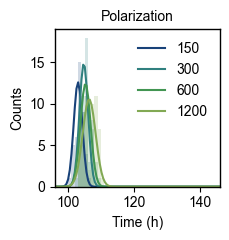

In [12]:
# one histogram for all size groups
start = 0
data_dict_polarization = {}

plt.figure(figsize=(2.4 ,2.5))
for i, (l, g) in enumerate(zip(list_len, sizes)):
    
    hist_data = plt.hist(polar_transition[g], alpha=0.2, range=(96, 146), bins=146-96, 
                         density=False, color=color_dict_sizes[g])
    
    mean = np.nanmean(polar_transition[g], axis=0)
    var = np.nanvar(polar_transition[g], axis=0)
    std = np.nanstd(polar_transition[g], axis=0)
    cv = np.divide(std, mean)
    
    data_dict_polarization[g] = [mean, var, std, cv, polar_transition[g], areas[start:start+l, 0]]
    start += l

    # Fitting the normal distribution
    mu, std = norm.fit(polar_transition[g])
    x = np.linspace(96, 146, 100)
    p = norm.pdf(x, mu, std) * len(polar_transition[g]) * (146 - 96) / len(hist_data[0])  # scaling to match histogram
    plt.plot(x, p, color=color_dict_sizes[g], linewidth=1.5, label=g)

plt.title('Polarization')     
plt.xlabel('Time (h)')
plt.ylabel('Counts')
plt.xlim(96, 146)
plt.ylim(0, 19)
plt.legend(frameon=False)

plt.tight_layout()
#plt.savefig(plots_folder+ 'first_transition_hist_with_fit.svg', dpi=200, transparent=True)
plt.show()

### Table 3: Polarization timing statistics.

In [13]:
df_pol = pd.DataFrame(columns=['Sample', 'Mean t (h)', 'S.d. (h)', 'C.v. (%)', 'N'],index=[np.arange(4)])

for i, (l, g) in enumerate(zip(list_len, sizes)):
    N = l
    stats = data_dict_polarization[g]
                              
    df_pol.at[i, 'Sample'] = g 
    df_pol.at[i, 'Mean t (h)'] = stats[0]
    df_pol.at[i, 'S.d. (h)'] = stats[2]
    df_pol.at[i, 'C.v. (%)'] = stats[3]*100
    df_pol.at[i, 'N'] = N
    
df_pol

,Sample,Mean t (h),S.d. (h),C.v. (%),N
0,150,103.02439,1.297047,1.258971,41
1,300,104.77551,1.313436,1.253572,49
2,600,105.291667,1.54054,1.463117,48
3,1200,106.403846,1.963705,1.845521,52


## Stable uniaxial transition

### Figure 2 E

= Transition from 0 or >1 to 1 (uniaxial) pole 
("stable pole" = the first time point at which a single pole is detected and after which multipolarity is never again observed)

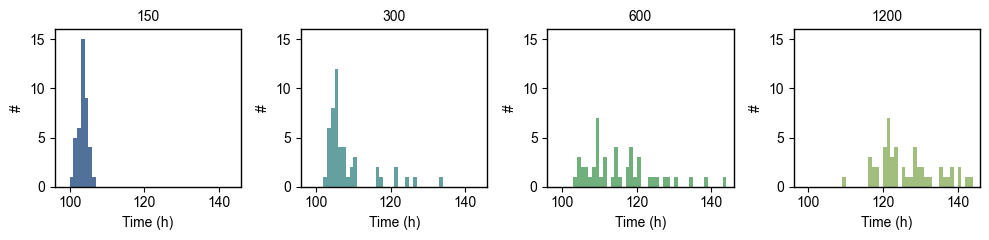

In [14]:
# individual histograms per size group
fig, axes = plt.subplots(1, 4, figsize=(10,2.5))

for i, (g, ax) in enumerate(zip(sizes, axes)):
    
    ax.hist(uniax_transition[g], label=g, alpha=0.75, range=(96, 146), bins=146-96, 
            density=False, color=color_dict_sizes[g])
    
    ax.set_title(g)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('#')
    ax.set_xlim(96, 146)
    ax.set_ylim(0,16)
    
plt.tight_layout()
#plt.savefig(plots_folder+ f'last_transition_hist_{g}.svg', dpi=200, transparent=True)
plt.show()

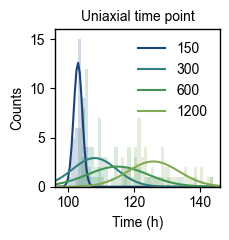

In [15]:
# one histogram for all size groups
start = 0
data_dict_uniax = {}

plt.figure(figsize=(2.4,2.5))
for i, (l, g) in enumerate(zip(list_len, sizes)):
    
    plt.hist(uniax_transition[g], alpha=0.2, range=(96, 146), bins=146-96, 
             density=False, color=color_dict_sizes[g])

    mean = np.nanmean(uniax_transition[g], axis=0)
    var = np.nanvar(uniax_transition[g], axis=0)
    std = np.nanstd(uniax_transition[g], axis=0)
    cv = np.divide(std, mean)
    
    data_dict_uniax[g] = [mean, var, std, cv, uniax_transition[g], areas[start:start+l, 0]]
    start += l
    
    # Fitting the normal distribution
    mu, std = norm.fit(uniax_transition[g])
    x = np.linspace(96, 146, 100)
    p = norm.pdf(x, mu, std) * len(uniax_transition[g]) * (146 - 96) / len(hist_data[0])  # scaling to match histogram
    plt.plot(x, p, color=color_dict_sizes[g], linewidth=1.5, label=g)
    
plt.title('Uniaxial time point')    
plt.xlabel('Time (h)')
plt.ylabel('Counts')
plt.xlim(96, 146)
plt.ylim(0, 16)
plt.legend(frameon=False)

plt.tight_layout()
#plt.savefig(plots_folder+ f'last_transition_hist_with_fit.svg', dpi=200, transparent=True)
plt.show()

### Table 2: Uniaxiality timing statistics

In [16]:
df_uni = pd.DataFrame(columns=['Sample', 'Mean t (h)', 'S.d. (h)', 'C.v. (%)', 'N',
                               'N uniaxial',  'Fraction uniaxial (%)'], index=[np.arange(4)])

for i, (l, g) in enumerate(zip(list_len, sizes)):
    N = l
    stats = data_dict_uniax[g]
                              
    df_uni.at[i, 'Sample'] = g 
    df_uni.at[i, 'Mean t (h)'] = stats[0]
    df_uni.at[i, 'S.d. (h)'] = stats[2]
    df_uni.at[i, 'C.v. (%)'] = stats[3]*100
    df_uni.at[i, 'N'] = N
    df_uni.at[i, 'N uniaxial'] = len(stats[4])
    df_uni.at[i, 'Fraction uniaxial (%)'] = (len(stats[4]) / N)*100
    
df_uni

,Sample,Mean t (h),S.d. (h),C.v. (%),N,N uniaxial,Fraction uniaxial (%)
0,150,103.02439,1.297047,1.258971,41,41,100.0
1,300,108.040816,6.712642,6.213061,49,49,100.0
2,600,115.042553,9.174334,7.974731,48,47,97.916667
3,1200,125.84,7.770097,6.174584,52,50,96.153846


## Multipolarity resolution time

### Figure S3 G

= Transition from >1 to 1 (uniaxial) stable pole (resolution of multipolarity) 

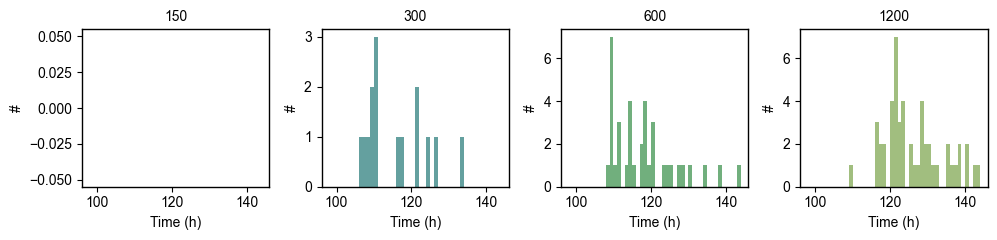

In [17]:
# individual histograms per size group
start = 0
fig, axes = plt.subplots(1, 4, figsize=(10,2.5))

for i, ( g, ax) in enumerate(zip(sizes, axes)):
    
    ax.hist(merged_transition[g], label=g, alpha=0.75, range=(96, 146), bins=146-96, 
            density=False, color=color_dict_sizes[g])
    
    ax.set_title(g)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('#')
    ax.set_xlim(96, 146)
    
plt.tight_layout()
#plt.savefig(plots_folder+ f'merging_transition_hist.svg', dpi=200, transparent=True)
plt.show()

/opt/anaconda3/envs/image_analysis/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:479: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/opt/anaconda3/envs/image_analysis/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/image_analysis/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:484: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


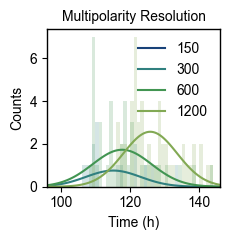

In [18]:
# one histogram for all size groups
plt.figure(figsize=(2.4,2.5))
for i, g in enumerate(sizes):
    
    plt.hist(merged_transition[g], alpha=0.2, range=(96, 146), bins=146-96, 
             density=False, color=color_dict_sizes[g])
    
    # Fitting the normal distribution
    mu, std = norm.fit(merged_transition[g])
    x = np.linspace(96, 146, 100)
    p = norm.pdf(x, mu, std) * len(merged_transition[g]) * (146 - 96) / len(hist_data[0])  # scaling to match histogram
    plt.plot(x, p, color=color_dict_sizes[g], linewidth=1.5, label=g)

plt.title('Multipolarity Resolution')    
plt.xlabel('Time (h)')
plt.ylabel('Counts')
plt.xlim(96, 146)
plt.legend(frameon=False)

plt.tight_layout()
#plt.savefig(plots_folder+ f'merging_transition_hist.svg', dpi=200, transparent=True)
plt.show()

## Comparison of different parameters of multipolarity - Polarization vs Uniaxial timing

#### Combine the data from polarization and uniaxial transitions in dataframes to facilitate combined plotting

In [19]:
# setting up the data frames
transition_type = ['polarization: ', 'uniaxiality: ']
columns = ['mean', 'var', 'std', 'cv', 'data', 'area']
colors = ['#184279','#30807f','#429552','#82a954']

df3, df4 = pd.DataFrame(data=data_dict_polarization), pd.DataFrame(data=data_dict_uniax)
df3, df4 = df3.T, df4.T

for df in [df3, df4]:
    
    df.columns = columns
    df['colors'] = colors
    df['volume'] = df['area']
    
    # inferring the volume of a gastruloid from its measured area at 73h (while still spherical)
    for g in sizes[::-1]:
        vs = []
        data = df.at[g, 'area']
        
        for ix in range(len(data)):
            area = data[ix]
            vs.append(4/3 * np.pi * ((area/np.pi)**0.5)**3)
            
        df.at[g, 'volume'] = vs
        
        
    df['mean_area'] = [np.mean(df.at[g, 'area']) for g in df.index]
    df['mean_volume'] = [4/3 * np.pi * ((df.at[g, 'mean_area']/np.pi)**0.5)**3 for g in df.index]

### Figure 2 E 

Comparison of polarization and uniaxiality dynamics across different size groups. 
Scatter plot show mean ± s.d. of these time points versus gastruloid size (N0 or volume). Gray dotted lines indicate linear fits to guide the eye (calulated based on the average data, not from the individual gastruloids).

polarization:  m = -299.339    R2 = 0.824
uniaxiality:  m = -46.663    R2 = 0.987


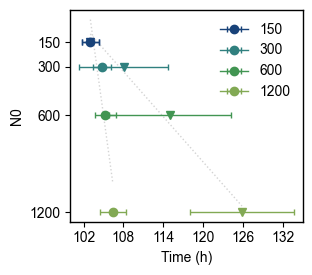

In [20]:
# scatter: polarization and uniaxial timing against N0 (linear scale)

fig, ax = plt.subplots(1,1, figsize=(3,2.75))


for i, df in enumerate([df3, df4]):
    x = list(df['mean'])
    y = [150, 300, 600, 1200]
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef) 
    correlation = np.corrcoef(x, y)[0,1]
    print(transition_type[i], 'm =', round(-1*coef[0], 3), '   R2 =',  round(correlation**2, 3))

    plt.plot(x, poly1d_fn(x), ls=':', color='lightgray')


for i, g in enumerate(sizes):
    data = data_dict_polarization[g]
    data_last = data_dict_uniax[g]
    
    ax.errorbar(np.mean(data[0]),int(g), xerr=data[2], color=color_dict_sizes[g], capsize=2, marker='o', alpha=1, label=g)
    ax.errorbar(np.mean(data_last[0]),int(g), xerr=data_last[2], color=color_dict_sizes[g], capsize=2, marker='v', alpha=1)

plt.ylabel('N0')    
plt.xlabel('Time (h)')
plt.xlim(100, 135)
plt.yticks([150, 300, 600, 1200])
plt.xticks([102,108, 114, 120, 126, 132])
plt.gca().invert_yaxis()
plt.legend(frameon=False)

plt.show()

polarization:  m = -0.994    R2 = 0.835
uniaxiality:  m = -0.154    R2 = 0.992


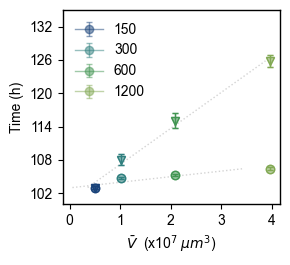

In [21]:
# scatter: polarization and uniaxial timing against volume

fig, ax = plt.subplots(1,1, figsize=(3,2.75))

for i, df in enumerate([df3, df4]):
    x = list(df['mean'])
    y = list(np.array(df['mean_volume']/1e7))
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef) 
    correlation = np.corrcoef(x, y)[0,1]
    print(transition_type[i], 'm =', round(-1*coef[0], 3), '   R2 =',  round(correlation**2, 3))
    plt.plot(poly1d_fn(x), x, ls=':', color='lightgray') 

    
for i, g in enumerate(sizes):
    
    data = data_dict_polarization[g]
    data_last = data_dict_uniax[g]
    
    ax.errorbar(np.array(df3.at[g, 'mean_volume'])/1e7, np.mean(data[0]), yerr=(data[2]/len(data[4])**0.5), color=color_dict_sizes[g], capsize=2, marker='o', alpha=0.5, label=g)#, markerfacecolor='None')
    ax.errorbar(np.array(df3.at[g, 'mean_volume'])/1e7, np.mean(data[0]), yerr=(data[2]/len(data[4])**0.5), color=color_dict_sizes[g], capsize=2, marker='o', alpha=1,  markerfacecolor='None')
    ax.errorbar(np.array(df4.at[g, 'mean_volume'])/1e7, np.mean(data_last[0]), yerr=(data_last[2]/len(data_last[4])**0.5), color=color_dict_sizes[g], capsize=2, marker='v', alpha=0.5)#, markerfacecolor='None')
    ax.errorbar(np.array(df4.at[g, 'mean_volume'])/1e7, np.mean(data_last[0]), yerr=(data_last[2]/len(data_last[4])**0.5), color=color_dict_sizes[g], capsize=2, marker='v', alpha=1, markerfacecolor='None')
    
plt.ylabel('Time (h)')
plt.xlabel(r'$\bar{V}$  (x10$^7$ $\mu m^3$)')
plt.ylim(100, 135)
plt.yticks([102,108, 114, 120, 126, 132])
#plt.gca().invert_yaxis()
plt.legend(frameon=False)

fig.tight_layout()
#plt.savefig(plots_folder+ 'volume_polarization_multi-resolution_t.svg', dpi=200, transparent=True)
plt.show()

## Distance between Mesp2 pole peak local maxima

In [22]:
pole_dist = list()
pole_num = list()
param1 = 'fluo_pole_coords'

for i, f in enumerate(sorted(all_df_list)):
    print(i)
    df = pda.load_processed_df(f)
    size = f.split('_cells', 1)[0].split('M1M2_', 1)[1]
    well = f.split('_1_merge')[0].split('[', 1)[1]
    
    try:
        # filtering all gastruloids marked as outliers and 
        # that had an ambiguous or misclassification of a Mesp2 pole at any time point 
        out = cnfgs['outliers'][size][well]
    
    except KeyError:
        # if a gastruloid is not classified as outlier, compute distances between poles
        pole_dist.append(pda.get_distance_between_poles(df[param1]))
        pole_num.append(poles[i])
    

0
# rows:  71
1
# rows:  71
2
# rows:  71
3
# rows:  71
4
# rows:  71
5
# rows:  71
6
# rows:  71
7
# rows:  71
8
# rows:  71
9
# rows:  71
10
# rows:  71
11
# rows:  71
12
# rows:  71
13
# rows:  71
14
# rows:  71
15
# rows:  71
16
# rows:  71
17
# rows:  71
18
# rows:  71
19
# rows:  71
20
# rows:  71
21
# rows:  71
22
# rows:  71
23
# rows:  71
24
# rows:  71
25
# rows:  71
26
# rows:  71
27
# rows:  71
28
# rows:  71
29
# rows:  71
30
# rows:  71
31
# rows:  71
32
# rows:  71
33
# rows:  71
34
# rows:  71
35
# rows:  71
36
# rows:  71
37
# rows:  71
38
# rows:  71
39
# rows:  71
40
# rows:  71
41
# rows:  71
42
# rows:  71
43
# rows:  71
44
# rows:  71
45
# rows:  71
46
# rows:  71
47
# rows:  71
48
# rows:  71
49
# rows:  71
50
# rows:  71
51
# rows:  71
52
# rows:  71
53
# rows:  71
54
# rows:  71
55
# rows:  71
56
# rows:  71
57
# rows:  71
58
# rows:  71
59
# rows:  71
60
# rows:  71
61
# rows:  71
62
# rows:  71
63
# rows:  71
64
# rows:  71
65
# rows:  71
66
# rows:  71
67
# 

In [23]:
pxsize = df['Pixel_size'].unique()[0]
dist_list_len = list()

# number of movies/gastruloids to be analysed per condition (stricter outlier filtering than before)
for l, N in zip(list_len, sizes):
    print(l - len(cnfgs['outliers'][N].keys()), '/' ,  l)
    dist_list_len.append(l - len(cnfgs['outliers'][N].keys()))
    
print('total:',len(pole_dist))


ranges = {'150': [0, dist_list_len[0]], 
          '300': [sum(dist_list_len[:1]), sum(dist_list_len[:2])],
          '600': [sum(dist_list_len[:2]), sum(dist_list_len[:3])],
         '1200': [sum(dist_list_len[:3]), sum(dist_list_len[:4])],}
ranges

24 / 41
35 / 49
29 / 48
10 / 52
total: 98


{'150': [0, 24], '300': [24, 59], '600': [59, 88], '1200': [88, 98]}

## Figure S3 F

Showing the euclidean distances between any two peak local maxima (Mesp2 poles) over time per gastruloids for each $N_0$ condition individually. Colors indicate individually followed gastruloids.

/var/folders/ts/7fd1dxm549x54fh6td1l_tzw0000gn/T/ipykernel_13715/1326859429.py:13: RuntimeWarning: All-NaN slice encountered
  if np.nanmin(np.hstack(i)) > 0:
35it [00:00, 64.72it/s]


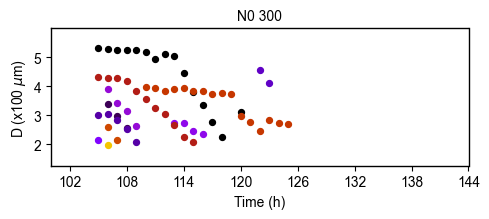

29it [00:01, 16.78it/s]


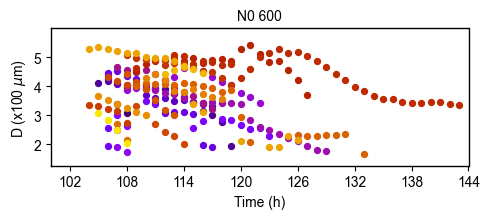

10it [00:00, 17.16it/s]


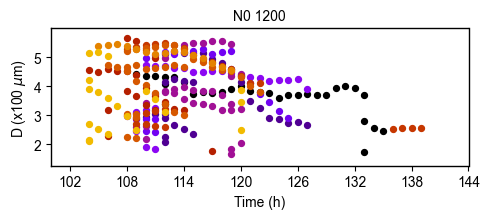

In [24]:
# compute min, mean, and max distance between Mesp2 poles within a gastruloid 
# plot distance between any two poles over time per size condition 
maxes = {}
mins = {}
means = {}

for n, g in enumerate(sizes[1:]):

    plt.figure(figsize=(5,2.3))
    mas, mis, mes = list(), list(), list()
    
    for k, i in tqdm(enumerate(pole_dist[ranges[g][0]:ranges[g][1]])):
        if np.nanmin(np.hstack(i)) > 0:
            mas.append(np.nanmax(np.hstack(i)))
            mis.append(np.nanmin(np.hstack(i)))
            mes.append(np.nanmean(np.hstack(i)))
            
            color = plt.cm.gnuplot(k/dist_list_len[n+1])
            for l, j in enumerate(i):
                plt.scatter([l+73]*len(j), np.array(j)*pxsize/100, color=color, s=18)
                
    maxes[g], mins[g], means[g] = mas, mis, mes
    
    plt.title(f"N0 {g}") 
    plt.xlabel("Time (h)")
    plt.ylabel(r"D (x100 $\mu$m)")
    plt.xticks(np.arange(102, 145)[::6])
    plt.yticks(np.arange(2, 6))
    plt.ylim([1.25, 6])
    plt.xlim(100, 144)
    plt.tight_layout()
    #plt.savefig(plots_folder+ f'distance_poles_{g}.svg', dpi=200, transparent=True)
    
    plt.show()  

## Combine measurement of the distance between poles and the time it takes to merge the poles into a single pole (stable uniaxial gastruloid)

In [25]:
groups = ['300', '600', '1200']
maxes = {}
mins = {}
means = {}
fuse_time = {}

for n, g in enumerate(groups):

    mas, mis, mes, fts = list(), list(), list(), list()
    
    for k, (i, n) in tqdm(enumerate(zip(pole_dist[ranges[g][0]:ranges[g][1]], 
                                    pole_num[ranges[g][0]:ranges[g][1]]))):
        if np.nanmin(np.hstack(i)) > 0:
            if any(n > 1):        
                for z, (x, t) in enumerate(zip(n, keys)):
                    d_late = n[z:]
                    if len(np.unique(d_late)) == 1:
                        if np.unique(d_late)[0] == 1:
                            mas.append(np.nanmax(np.hstack(i)))
                            mis.append(np.nanmin(np.hstack(i)))
                            mes.append(np.nanmean(np.hstack(i)))
                            fts.append(t)
                            break                      
                
    maxes[g], mins[g], means[g], fuse_time[g] = mas, mis, mes, fts

/var/folders/ts/7fd1dxm549x54fh6td1l_tzw0000gn/T/ipykernel_13715/63912234.py:13: RuntimeWarning: All-NaN slice encountered
  if np.nanmin(np.hstack(i)) > 0:
35it [00:00, 8098.01it/s]
29it [00:00, 4021.12it/s]
10it [00:00, 2816.86it/s]


## Figure 2 F

Maximum (first) and minimum (second) distances between peak local maxima of the Mesp2 poles as functions of multipolarity resolution time (measured as the transition time point from >1 Mesp2 pole to a single stable pole). Solid gray line indicates the average minimum distance across all conditions (min= 254 ± 77 μm).

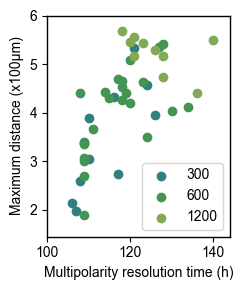

In [26]:
plt.figure(figsize=(2.5,3.))

for g in groups:
    plt.scatter(fuse_time[g], np.array(maxes[g])*pxsize/100, color=color_dict_sizes[g], label=g)

plt.ylim(1.45, 6)
plt.xlim(100, 144)
plt.xlabel('Multipolarity resolution time (h)')
plt.ylabel('Maximum distance (x100µm)')
plt.legend(frameon=True)

plt.tight_layout()
#plt.savefig(plots_folder+ f'max_distance_legend.svg', dpi=200, transparent=True)
plt.show()

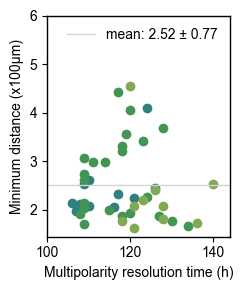

In [27]:
all_mins = list()
plt.figure(figsize=(2.5,3.))

for g in groups:
    mis = np.array(mins[g])*pxsize/100
    all_mins += list(mis)
    
    plt.scatter(fuse_time[g], np.array(mins[g])*pxsize/100, color=color_dict_sizes[g])

plt.plot([100, 144], [np.nanmean(all_mins),np.nanmean(all_mins)], 
         ls='-', lw=1, color='lightgray', label=f'mean: {round(np.nanmean(all_mins), 2)} ± {round(np.std(all_mins), 2)}')

## get medial axis length values 
#length150 = MA[:list_len[1]]
#plt.plot([100, 144], [np.nanmean(length150[:,27]/100),np.nanmean(length150[:,27]/100)], 
#         ls=':', lw=1, color='lightgray', label='Length N0=150, t=102h')    
    
plt.ylim(1.45, 6)
plt.xlim(100, 144)
plt.xlabel('Multipolarity resolution time (h)')
plt.ylabel('Minimum distance (x100µm)')
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig(plots_folder+ f'min_distance_legend.svg', dpi=200, transparent=True)
plt.show()

### Calculate the last distance between the poles before they resolve to one

In [28]:
lasts = {}
fuse_time = {}

for n, g in enumerate(groups):

    last, fts = list(), list()
    
    for k, (i, n) in tqdm(enumerate(zip(pole_dist[ranges[g][0]:ranges[g][1]], 
                                    pole_num[ranges[g][0]:ranges[g][1]]))):
        #if np.nanmin(np.hstack(i)) > 0: ## if that gastruloid has a distance lager than 1 and if the gastruloid has any number of poles larger than 1
        if any(n > 1):        
            for z, (x, t) in enumerate(zip(n, keys)):
                d_late = n[z:] 
                if len(np.unique(d_late)) == 1: # wenn es nur noch eine anzahl an poles gibt 
                    if np.unique(d_late)[0] == 1: # wenn diese anzahl = 1 ist => stable unique pole
                        last.append(np.nanmin(i[z-1]))
                        fts.append(t)
                        break                      
                
    fuse_time[g], lasts[g] = fts, last

35it [00:00, 12924.87it/s]
29it [00:00, 6774.05it/s]
10it [00:00, 2765.41it/s]


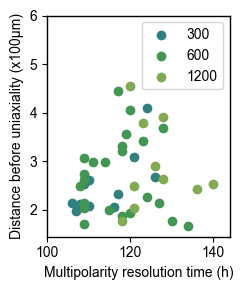

In [29]:
plt.figure(figsize=(2.5,3.))

for g in groups:
    plt.scatter(fuse_time[g], np.array(lasts[g])*pxsize/100, color=color_dict_sizes[g], label=g)

plt.ylim(1.45, 6)
plt.xlim(100, 144)
plt.xlabel('Multipolarity resolution time (h)')
plt.ylabel('Distance before uniaxiality (x100µm)')
plt.legend(frameon=True)

plt.tight_layout()
#plt.savefig(plots_folder+ f'max_distance_legend.svg', dpi=200, transparent=True)
plt.show()

## Figure S3 H
Maximum, mean, and minimum distances and last distance measured before achieving uniaxiality between \textit{Mesp2} poles for each N0 size condition. Gray dashed line is the average minimum distance across all gastruloids, min = 254 ± 77 μm (mean ± s.d.).

300 2.42 ± 0.56
600 2.67 ± 0.8
1200 2.28 ± 0.81
All sizes mean ± std:  2.519 ± 0.768


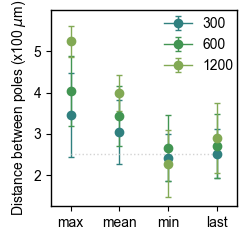

In [30]:
plt.figure(figsize=(2.6,2.5))
groups = ['300', '600', '1200']
all_mins = list()

for i, g in enumerate(groups):

    color = color_dict_sizes[g]
    mis = np.array(mins[g])*pxsize/100
    mes = np.array(means[g])*pxsize/100
    mas = np.array(maxes[g])*pxsize/100
    las = np.array(lasts[g])*pxsize/100

    plt.errorbar([1.5],   np.mean(las), yerr=np.std(las),   color=color, marker='o', capsize=2)
    plt.errorbar([1],   np.mean(mis), yerr=(np.std(mis)), color=color, marker='o', capsize=2, label=groups[i])
    plt.errorbar([0.5], np.mean(mes), yerr=np.std(mes),   color=color, marker='o', capsize=2)
    plt.errorbar([0],   np.mean(mas), yerr=np.std(mas),   color=color, marker='o', capsize=2)

    print(groups[i], round(np.mean(mis), 2), "±" , round(np.std(mis), 2))
    all_mins += list(mis)


plt.plot([0,1.5], [np.mean(all_mins), np.mean(all_mins)], color='lightgray', ls=':')
print('All sizes mean ± std: ', round(np.mean(all_mins), 3), "±" , round(np.std(all_mins), 3))

plt.ylabel(r'Distance between poles (x100 $\mu$m)')
plt.xticks([0,0.5,1, 1.5], ['max', 'mean', 'min', 'last'])
plt.ylim([1.25, 6])
plt.xlim(-0.2, 1.7)
plt.yticks([2,3,4,5])
plt.legend(frameon=False, bbox_to_anchor=[1.05, 1.03])

plt.tight_layout()
#plt.savefig(plot_path+ 'distance_mean_um.svg', dpi=200, transparent=True)

plt.show()

## Different morphodynamics of uniaxial and multipolar gastruloids of the same N0

In [31]:
## change list len settings to look at different sizes
mean_dict_uni = {}
std_dict_uni = {}
se_dict_uni = {}

mean_dict_multi = {}
std_dict_multi = {}
se_dict_multi = {}

for k in range(len(sizes)):
    x1 = k
    x2 = k+1
    size=sizes[k]

    group_poles = poles[sum(list_len[:x1]):sum(list_len[:x2])]
    group_AR = AR[sum(list_len[:x1]):sum(list_len[:x2])]
    multi_AR = list()
    uni_AR = list()
    
    for i, gast in enumerate(group_poles):
        if max(gast) > 1:
            multi_AR.append(group_AR[i])
        else:
            uni_AR.append(group_AR[i])


    ## uniaxial AR
    filtered_uni_AR = uni_AR.copy()
    filtered_multi_AR = multi_AR.copy()
    
    for i, ar in enumerate(uni_AR):
        arr = pda.filter_peaks_troughs_array(ar)
        arr[arr < 0] = np.nan
        filtered_arr = pda.filter_outliers_array(arr)
        filtered_uni_AR[i] = filtered_arr
        
    for i, ar in enumerate(multi_AR):
        arr = pda.filter_peaks_troughs_array(ar)
        arr[arr < 0] = np.nan
        filtered_arr = pda.filter_outliers_array(arr)
        filtered_multi_AR[i] = filtered_arr
    
    mean_dict_uni[size] = np.nanmean(filtered_uni_AR, axis=0)
    std_dict_uni[size] = np.nanstd(filtered_uni_AR, axis=0)
    se_dict_uni[size] = std_dict_uni[size]/(len(filtered_uni_AR)**0.5)
    mean_dict_multi[size] = np.nanmean(filtered_multi_AR, axis=0)
    std_dict_multi[size] = np.nanstd(filtered_multi_AR, axis=0)
    se_dict_multi[size]  = std_dict_multi[size]/(len(filtered_multi_AR)**0.5)
    

/var/folders/ts/7fd1dxm549x54fh6td1l_tzw0000gn/T/ipykernel_13715/2168541273.py:46: RuntimeWarning: Mean of empty slice
  mean_dict_multi[size] = np.nanmean(filtered_multi_AR, axis=0)
/opt/anaconda3/envs/image_analysis/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/ts/7fd1dxm549x54fh6td1l_tzw0000gn/T/ipykernel_13715/2168541273.py:43: RuntimeWarning: Mean of empty slice
  mean_dict_uni[size] = np.nanmean(filtered_uni_AR, axis=0)


## Figure S3 E

Mean aspect ratio (mean $\pm$ s.e.m.) across time (96–144 h post-seeding) for varying $N_0$ contrasting uniaxial and multipolar gastruloids.

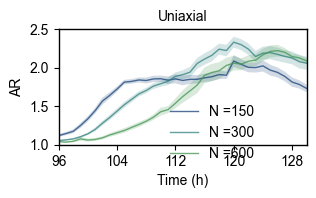

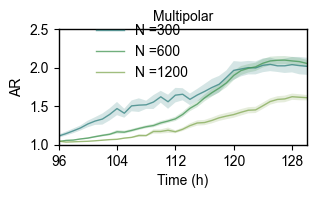

In [32]:
## uni comparison
plt.figure(figsize=(3.2, 1.5))
for s in sizes[:-1]:
    data = mean_dict_uni[s]
    var = se_dict_uni[s]
    plt.plot(keys, data, color=color_dict_sizes[s], label=f'N ={s}', alpha=0.75, lw=1)
    plt.fill_between(keys, data+var, data-var, color=color_dict_sizes[s], alpha=0.2, lw=0)

plt.xlabel('Time (h)')
plt.ylabel('AR')
plt.title('Uniaxial')
plt.xlim(96, 130)
plt.xticks([96, 104, 112, 120, 128])
#plt.legend(bbox_to_anchor=[1, 0.7])
plt.ylim(1, 2.5)
plt.legend(bbox_to_anchor=[0.4, 0.45], frameon=False)
#plt.savefig(plots_folder+ f'AR_vgl_uni_all.svg', dpi=200, transparent=True)
plt.show()


## multi comparison
plt.figure(figsize=(3.2, 1.5))

for s in sizes[1:]:
    data = mean_dict_multi[s]
    var = se_dict_multi[s]
    plt.plot(keys, data, color=color_dict_sizes[s], label=f'N ={s}', alpha=0.75, lw=1)
    plt.fill_between(keys, data+var, data-var, color=color_dict_sizes[s], alpha=0.2, lw=0)
plt.xlabel('Time (h)')
plt.ylabel('AR')
plt.title('Multipolar')

plt.xlim(96, 130)
plt.ylim(1, 2.5)
plt.xticks([96, 104, 112, 120, 128])
plt.legend(bbox_to_anchor=[0.1, 0.45], frameon=False)
#plt.savefig(plots_folder+ f'AR_vgl_multi_all.svg', dpi=200, transparent=True)
plt.show()

## Figure S3 D

Mean area (top), aspect ratio (center), and circularity (bottom) (mean $\pm$ s.e.m.) across time (96–144 h post-seeding) for varying $N_0$  contrasting uniaxial and multipolar gastruloids.

In [33]:
## change list len settings to look at different sizes
x1 = 2
x2 = 3
size=600

group_poles = poles[sum(list_len[:x1]):sum(list_len[:x2])]
group_AR = AR[sum(list_len[:x1]):sum(list_len[:x2])]
group_circ = circ[sum(list_len[:x1]):sum(list_len[:x2])]
group_area = areas[sum(list_len[:x1]):sum(list_len[:x2])]

multi = list()
multi_AR = list()
multi_circ = list()
multi_area = list()
uni = list()
uni_AR = list()
uni_circ = list()
uni_area = list()

for i, gast in enumerate(group_poles):
    if max(gast) > 1:
        multi.append(gast)
        multi_AR.append(group_AR[i])
        multi_circ.append(group_circ[i])
        multi_area.append(group_area[i])
    else:
        uni.append(gast)
        uni_AR.append(group_AR[i])
        uni_circ.append(group_circ[i])
        uni_area.append(group_area[i])

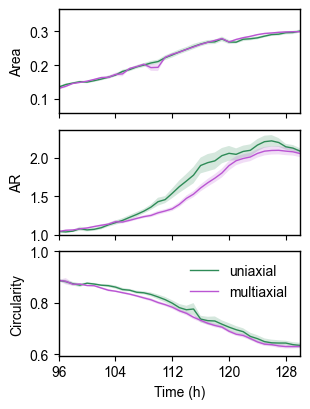

In [34]:
## uniaxial AR
filtered_uni_AR = uni_AR.copy()
filtered_multi_AR = multi_AR.copy()

fig, ax = plt.subplots(3, 1,figsize=(3.2, 4.2))

for j, (p_uni, p_multi) in enumerate([(np.array(uni_area)/10e5, np.array(multi_area)/10e5), (uni_AR, multi_AR), (uni_circ, multi_circ)]):

    for i, ar in enumerate(p_uni):
        arr = pda.filter_peaks_troughs_array(ar)
        arr[arr < 0] = np.nan
        filtered_arr = pda.filter_outliers_array(arr)
        filtered_uni_AR[i] = filtered_arr
        
    for i, ar in enumerate(p_multi):
        arr = pda.filter_peaks_troughs_array(ar)
        arr[arr < 0] = np.nan
        filtered_arr = pda.filter_outliers_array(arr)
        filtered_multi_AR[i] = filtered_arr
        
    mean_uni = np.nanmean(filtered_uni_AR, axis=0)
    std_uni = np.nanstd(filtered_uni_AR, axis=0)
    se_uni = std_uni/(len(filtered_uni_AR))**0.5
    mean_multi = np.nanmean(filtered_multi_AR, axis=0)
    std_multi = np.nanstd(filtered_multi_AR, axis=0)
    se_multi  = std_multi/(len(filtered_multi_AR))**0.5
    
    ax[j].plot(keys, mean_uni, color='seagreen', label='uniaxial', lw=1)
    ax[j].plot(keys, mean_multi, color='mediumorchid', label='multiaxial', lw=1)
    ax[j].fill_between(keys, mean_uni+se_uni, mean_uni-se_uni,color='seagreen', alpha=0.2, lw=0)
    ax[j].fill_between(keys, mean_multi+se_multi, mean_multi-se_multi, color='mediumorchid', alpha=0.2, lw=0)
    ax[j].set_xlim(96, 130)
    ax[j].set_xticks([96, 104, 112, 120, 128])

#ax[0].set_ylim(0, 0.23)
ax[0].set_ylabel('Area')
ax[0].set_xticks([96, 104, 112, 120, 128], labels=[])
ax[1].set_ylabel('AR')
ax[1].set_xticks([96, 104, 112, 120, 128], labels=[])
down, up = ax[1].get_ylim()
ax[1].set_ylim(1, up)

ax[2].set_ylabel('Circularity')
down, up = ax[2].get_ylim()
ax[2].set_ylim(down, 1)

ax[2].set_xlabel('Time (h)')

ax[2].legend(frameon=False)
#fig.legend(frameon=False, bbox_to_anchor=[1.15, 0.2])
plt.tight_layout(h_pad=0.2)
#plt.savefig(plots_folder+ f'area_AR_circ_vgl_uni_vs_multi_{size}_legend.svg', dpi=200, transparent=True)
plt.show()

## Figure S3 C

Scatter plots of circularity vs. aspect ratio for uniaxial (left) vs. multipolar (center) gastruloids grown from the same $N_0$, colored by time (96–144 h). On the right, contrasting the average morphological trajectories of uniaxial and multipolar gastruloids of the same size.

/var/folders/ts/7fd1dxm549x54fh6td1l_tzw0000gn/T/ipykernel_13715/1010943413.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


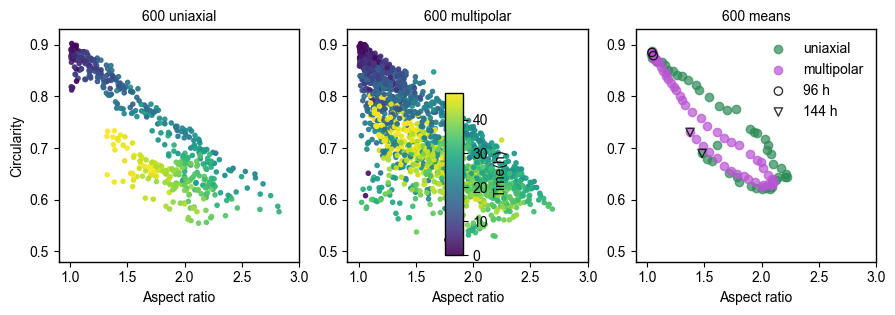

In [35]:
## uniaxial AR
filtered_uni_AR = uni_AR.copy()
filtered_multi_AR = multi_AR.copy()
filtered_uni_circ = uni_AR.copy()
filtered_multi_circ = multi_AR.copy()

fig, ax = plt.subplots(1, 3,figsize=(9, 3.25))

colors = np.arange(len(uni_AR[0][22:]))

for i in range(len(uni_AR)):
    ar1 = uni_AR[i]
    arr1 = pda.filter_peaks_troughs_array(ar1)
    arr1[arr1 < 0] = np.nan
    filtered_arr1 = pda.filter_outliers_array(arr1)
    filtered_uni_AR[i] = filtered_arr1

    ar2 = uni_circ[i]
    arr2 = pda.filter_peaks_troughs_array(ar2)
    arr2[arr2 < 0] = np.nan
    filtered_arr2 = pda.filter_outliers_array(arr2)
    filtered_uni_circ[i] = filtered_arr2
    im = ax[0].scatter(filtered_arr1[22:], filtered_arr2[22:], alpha=0.9, c=colors, cmap='viridis', marker='.')
    ax[0].set_title(f'{size} uniaxial')
    
for i in range(len(multi_AR)):
    ar1 = multi_AR[i]
    arr1 = pda.filter_peaks_troughs_array(ar1)
    arr1[arr1 < 0] = np.nan
    filtered_arr1 = pda.filter_outliers_array(arr1)
    filtered_multi_AR[i] = filtered_arr1

    ar2 = multi_circ[i]
    arr2 = pda.filter_peaks_troughs_array(ar2)
    arr2[arr2 < 0] = np.nan
    filtered_arr2 = pda.filter_outliers_array(arr2)
    filtered_multi_circ[i] = filtered_arr2
    ax[1].scatter(filtered_arr1[22:], filtered_arr2[22:], alpha=0.9, c=colors, cmap='viridis', marker='.')
    ax[1].set_title(f'{size} multipolar')

#ax[1].cbar
mean_uni_AR = np.nanmean(filtered_uni_AR, axis=0)
mean_uni_circ = np.nanmean(filtered_uni_circ, axis=0)
mean_multi_AR = np.nanmean(filtered_multi_AR, axis=0)
mean_multi_circ = np.nanmean(filtered_multi_circ, axis=0)

ax[2].scatter(mean_uni_AR[22:], mean_uni_circ[22:], alpha=0.7,label='uniaxial', color='seagreen')#, cmap='viridis', marker='.')
ax[2].scatter(mean_multi_AR[22:], mean_multi_circ[22:], alpha=0.7,label='multipolar', color='mediumorchid')# c=colors, cmap='viridis', marker='.')

ax[2].scatter(mean_uni_AR[22], mean_uni_circ[22], facecolor='None', edgecolor='k', alpha=0.8)
ax[2].scatter(mean_multi_AR[22], mean_multi_circ[22], facecolor='None', edgecolor='k', alpha=0.8, label='96 h')
ax[2].scatter(mean_uni_AR[-1], mean_uni_circ[-1], facecolor='None', edgecolor='black', marker='v', alpha=0.8)
ax[2].scatter(mean_multi_AR[-1], mean_multi_circ[-1], facecolor='None', edgecolor='black', marker='v', alpha=0.8, label='144 h')
ax[2].set_title(f'{size} means')
ax[2].legend(frameon=False)

for i in range(3):
    ax[i].set_ylim(0.48, 0.93)
    ax[i].set_xlim(0.9, 3.)
    ax[i].set_xlabel('Aspect ratio')
    
    
ax[0].set_ylabel('Circularity')

cax = fig.add_axes([0.5, 0.2, 0.02, 0.5])
fig.colorbar(im, cax=cax, orientation='vertical', label='Time(h)')
#fig.legend(frameon=False, bbox_to_anchor=[1.15, 0.2])
plt.tight_layout()
#plt.savefig(plots_folder+ f'scatter_in_size_group_differences_{size}_legend.svg', dpi=100, transparent=True)
plt.show()

### Effects of secondary pole formation on the aspect ratio

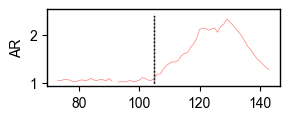

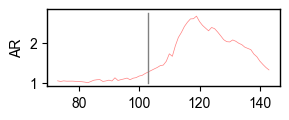

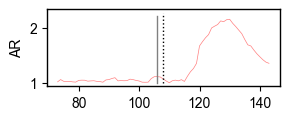

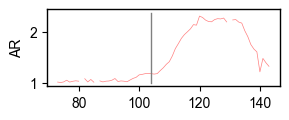

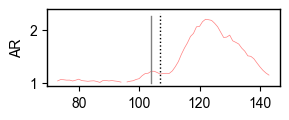

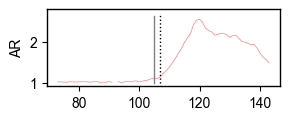

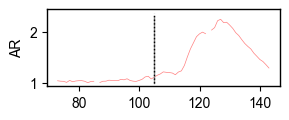

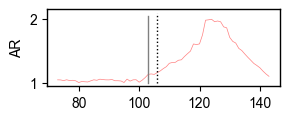

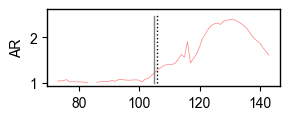

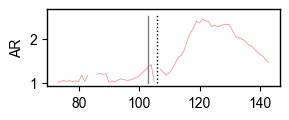

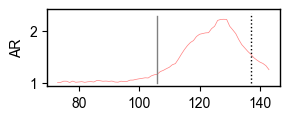

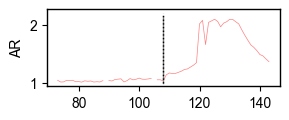

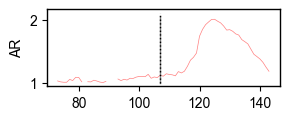

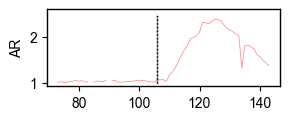

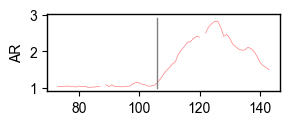

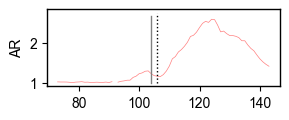

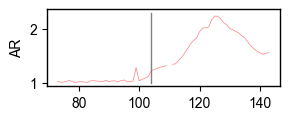

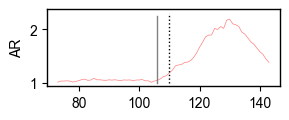

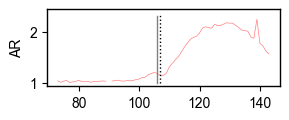

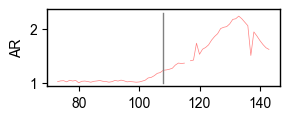

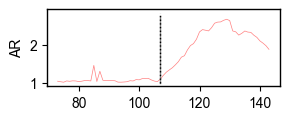

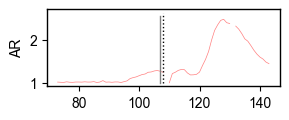

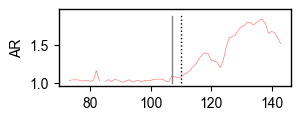

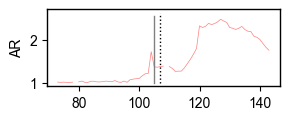

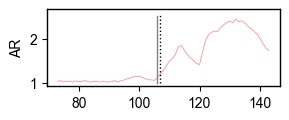

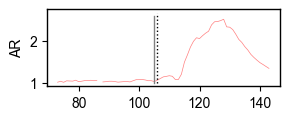

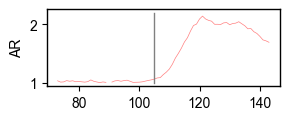

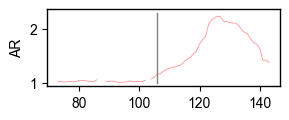

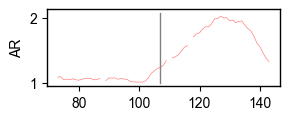

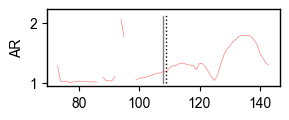

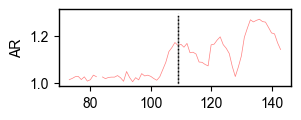

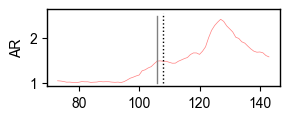

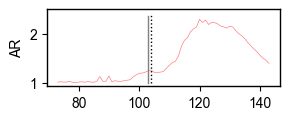

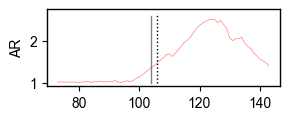

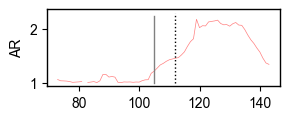

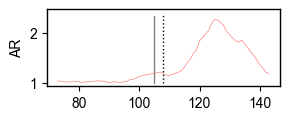

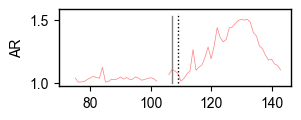

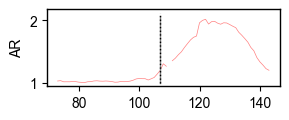

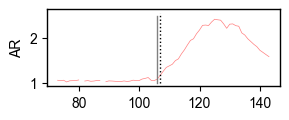

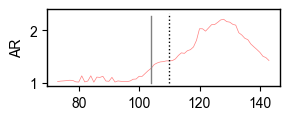

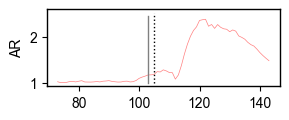

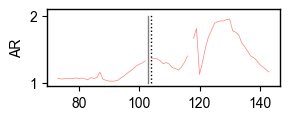

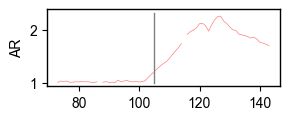

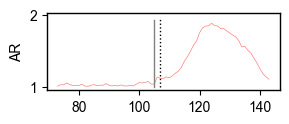

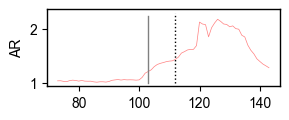

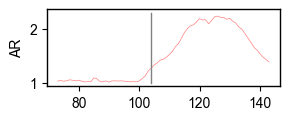

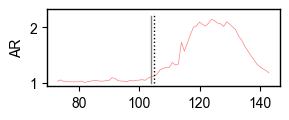

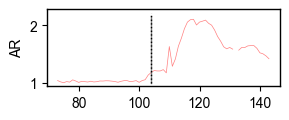

In [36]:
for i in range(len(group_poles)):

    fig, ax = plt.subplots(1, 1,figsize=(3, 1))
        
    ar = group_AR[i]
    arr = pda.filter_peaks_troughs_array(ar)
    arr[arr < 0] = np.nan
    filtered_arr = pda.filter_outliers_array(arr)

    ax.plot(keys, filtered_arr, color='red', lw=0.5, alpha=0.5) 
    ax.set_ylabel('AR')

    pole = group_poles[i]
    for t in range(len(pole)):
        if pole[t] > 0:
            ax.plot([keys[t], keys[t]], [1, ax.get_ylim()[1]], color='gray')
            break
    for t in range(len(pole)):
        if pole[t] > 1:
            ax.plot([keys[t], keys[t]], [1, ax.get_ylim()[1]], color='black', ls=':')
            break

    plt.show()
    #break